<a href="https://colab.research.google.com/github/Shivraj285/EDA-Hotel-Booking-Analysis/blob/main/Shivraj_Y_Saude_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

This data set has information of booking for Hotels, city hotel and a resort hotel and  includes other information such as Time of the booking, the number and age group of guests, details of parking spaces, Cancellations etc.

# We will perform **exploratory data analysis** with python libraries for data visualisation. This will help us to answer following questions:

***Q 1. What is the booking ratio between Resort Hotel and City Hotel?***

***Q 2. How many bookings were canceled in total and at hotel level?***

***Q 3 From which country majority of guest came?***

***Q 4. Which are the busiest months for hotel?***

***Q 5. In which years maximum bookings are done for both hotels?***

***Q 6. Which was the most booked accommodation type (Single, Couple, Family)?***

***Q 7. What are the Market Segment of both hotels?***
  


# **Import Packages**
**First of all, we will import the  necessary packages and datasets. These pacakges will be used in project for analysis and visualisation.**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import datetime as dt

pd.options.display.max_columns = None

In [2]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Its time to upload our dataset to use it as panda dataframe**

In [3]:
# loading csv File
file_path = '/content/drive/MyDrive/EDA for Hotel Bookings/Hotel Bookings.csv'
data=pd.read_csv(file_path)

**Now, We will see the first rows to check the data types in the dataset.**

In [4]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**We will make a copy of the data set as dataFrame, So that the original data can be kept as it was.**

In [5]:
# making a copy of data as data frame.
dataFrame = data.copy()  

**Perfect.. The copy is ready..
lets check**

In [6]:
dataFrame.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Before going futher... lets check how many rows and columns are present in our dataset**

In [7]:
#rows & columns of dataframe
print(dataFrame.shape)  

(119390, 32)


**So our dataset has 119390 rows and 32 columns. Now lets look at the summary of our dataset...**

In [8]:
#Statistical aspects of the dataframes
dataFrame.describe()  

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
#checking datatypes, here there are 32 rows.
dataFrame.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            


**The dataset have 32 variables (Continuous and Categorical) with one identified dependent variable (categorical), which is 'is_cancelled'.**

#**Total Number of Resort and City Hotels**

**Now we will check the count of both the hotels...**

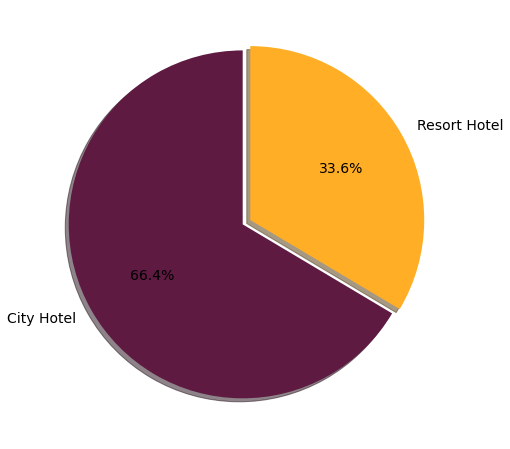

In [10]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
Labels = dataFrame['hotel'].value_counts().index.tolist()

# Convert value counts to list
Sizes = dataFrame['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
Explode = (0, 0.05)

# Determine colour of pie chart
Colors = ['#5e1a41','#ffae25']

plt.pie(Sizes, explode=Explode ,labels=Labels, colors=Colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14,'color':'black'},shadow=True)
plt.show()


1. We can see that the percent of City hotel is more compared to Resort   hotel.
2. Resort Hotel tend to be on the expensive side and most people will just stick with city hotel.

#**1. Cleaning the Data**

**Now we are getting close to our analysis.
First step will be to clean our data, any irrelevant or missing information i.e. NULL will be removed from the data now, so that we can start working on the relevant data...**

In [11]:
 #Checking the missing value columns in descending order
dataFrame.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [12]:
# null percentage column-wise 
print(round(100*(dataFrame.isnull().sum()/len(dataFrame.index)).sort_values(ascending=False),2))

company                           94.31
agent                             13.69
country                            0.41
children                           0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
hotel                              0.00
previous_cancellations             0.00
days_in_waiting_list               0.00
customer_type                      0.00
adr                                0.00
required_car_parking_spaces        0.00
total_of_special_requests          0.00
reservation_status                 0.00
previous_bookings_not_canceled     0.00
is_repeated_guest                  0.00
is_canceled                        0.00
distribution_channel               0.00
market_segment                     0.00
meal                               0.00
babies                             0.00
adults                             0.00
stays_in_week_nights               0.00


**The dataset contains Missing values .**


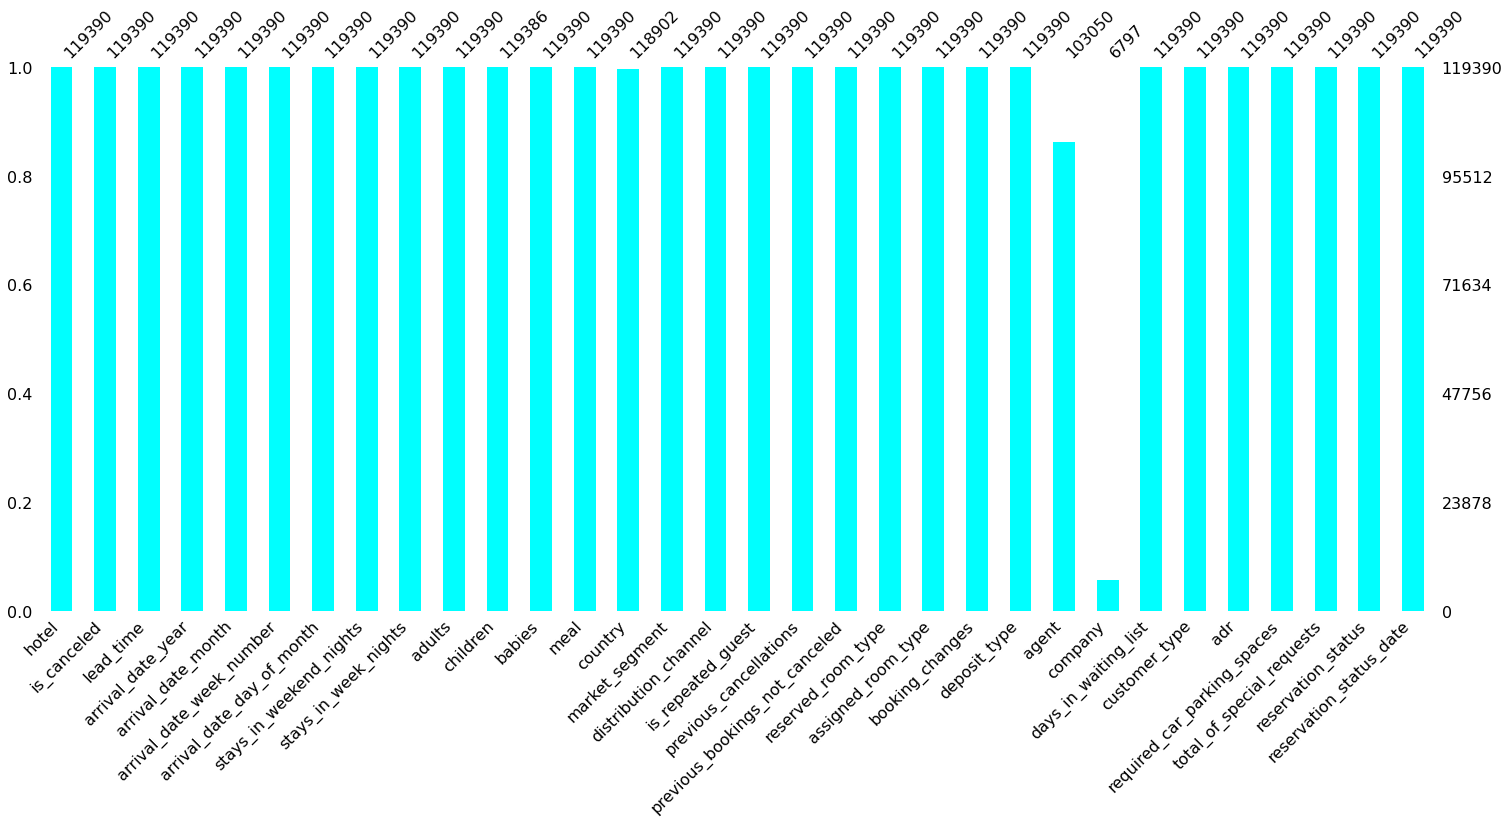

In [13]:
import missingno as msno
msno.bar(data,color='cyan')

#Drop unnecessary columns


**Lets drop columns with high missing values.**

In [14]:
dataFrame=dataFrame.drop(['agent','company'],axis=1)

**Country has 488 rows with the NaN values. 488 rows out of 119390 is negligible hence we will just remove.**

In [15]:
dataFrame = dataFrame.dropna(axis = 0)

In [16]:
dataFrame.isnull().sum().sort_values(ascending=False) 

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month                0
arrival_date_year           

**No more missing values in the data**

In [17]:
#checking datatypes & there are 30 columns
dataFrame.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

In [18]:
dataFrame.columns = ['Hotel', 'Canceled', 'LeadTime', 'ArrivingYear', 'ArrivingMonth', 'ArrivingWeek','ArrivingDate', 'WeekendStay',
              'WeekStay', 'Adults', 'Children', 'Babies', 'Meal','Country', 'Segment', 'DistChannel','RepeatGuest', 'PrevCancel',
              'PrevBook', 'BookRoomType','AssignRoomType', 'ChangeBooking', 'DepositType', 'WaitingDays', 
              'CustomerType', 'ADR','ParkSpace', 'SpecialRequest','Reservation', 'ReservationDate']

In [19]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Hotel            118898 non-null  object 
 1   Canceled         118898 non-null  int64  
 2   LeadTime         118898 non-null  int64  
 3   ArrivingYear     118898 non-null  int64  
 4   ArrivingMonth    118898 non-null  object 
 5   ArrivingWeek     118898 non-null  int64  
 6   ArrivingDate     118898 non-null  int64  
 7   WeekendStay      118898 non-null  int64  
 8   WeekStay         118898 non-null  int64  
 9   Adults           118898 non-null  int64  
 10  Children         118898 non-null  float64
 11  Babies           118898 non-null  int64  
 12  Meal             118898 non-null  object 
 13  Country          118898 non-null  object 
 14  Segment          118898 non-null  object 
 15  DistChannel      118898 non-null  object 
 16  RepeatGuest      118898 non-null  int6

#**Data Preparation**
**As of now, we have the complete information in our dataset... but it is not in proper format , so we will combine some items and prepare our data for further coding and analysis.. lets do it...**

In [20]:
 #Combining children and babies together as kids
dataFrame['Kids'] = dataFrame.Children + dataFrame.Babies

In [21]:
#Combining kids and adults
dataFrame['total_members'] = dataFrame.Kids + dataFrame.Adults 

In [22]:
#convert the datatypes to string
dataFrame['ArrivingYear'] = dataFrame['ArrivingYear'].astype('str')
dataFrame['ArrivingMonth'] = dataFrame['ArrivingMonth'].astype('str')
dataFrame['ArrivingDate'] = dataFrame['ArrivingDate'].astype('str')

dataFrame['Canceled'] = dataFrame['Canceled'].astype('str')
dataFrame['RepeatGuest'] = dataFrame['RepeatGuest'].astype('str')
                                  

In [23]:
#converting arrival date to datetime
dataFrame['Arrival Date'] = dataFrame['ArrivingDate'] + '-' + dataFrame['ArrivingMonth'] + '-' + dataFrame['ArrivingYear']
dataFrame['Arrival Date'] = pd.to_datetime(dataFrame['Arrival Date'], errors='coerce')

In [24]:
confirmed_bookings = dataFrame[dataFrame.Canceled=='0']

In [25]:
confirmed_bookings['ArrivingMonth'] = dataFrame['Arrival Date'].dt.month
final=confirmed_bookings['ArrivingMonth'].value_counts().sort_index()
final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1     4068
2     5317
3     6591
4     6533
5     7102
6     6393
7     7892
8     8618
9     6367
10    6867
11    4632
12    4365
Name: ArrivingMonth, dtype: int64

#**Exploratory Data Analysis**

**Now we have sorted and fully prepared data to work on. We can start exploratory data analysis. We will explore the data to get some insights from it.**

**We will start answering the questions one by one...**

# ***Q 1. What is the booking ratio between Resort Hotel and City Hotel?***

**As the data belongs to two hotels, we will try to get the ratio of bookings between these two. As it can show us the popularity of the given hotels.**

In [26]:
def get_count(series, limit=None):
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

In [27]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar', palettes=None):
    
    sns.set_style('white')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax, palette=palettes)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()

In [28]:
df_not_canceled = dataFrame[dataFrame['Canceled'] == '0']
df_not_canceled.head()

,Hotel,Canceled,LeadTime,ArrivingYear,ArrivingMonth,ArrivingWeek,ArrivingDate,WeekendStay,WeekStay,Adults,Children,Babies,Meal,Country,Segment,DistChannel,RepeatGuest,PrevCancel,PrevBook,BookRoomType,AssignRoomType,ChangeBooking,DepositType,WaitingDays,CustomerType,ADR,ParkSpace,SpecialRequest,Reservation,ReservationDate,Kids,total_members,Arrival Date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,0.0,2.0,2015-07-01


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


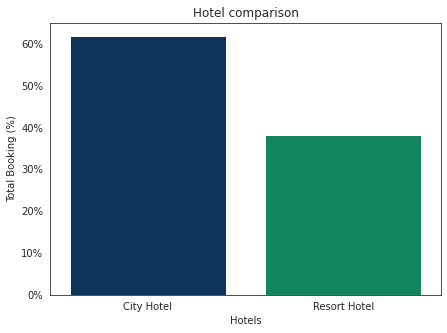

In [29]:
x,y = get_count(df_not_canceled['Hotel'])
plot(x,y, x_label='Hotels', y_label='Total Booking (%)',title='Hotel comparison',palettes=('#003366','#009966'))

**Ans:   So as shown in the graph, more than 60 % bookings were made for City Hotel, on the other hand, less than 40% bookings were made for Resort Hotel .**
**We can see that the percentage of City hotels is more compared to Resort hotels in terms of bookings**.

# ***Q 2. How many bookings were canceled ?***

In [30]:
print('Total Bookings canceled')
print('-'*50)
print(dataFrame.Canceled.value_counts())
print('-'*50)
print('*'*75)
print('Cancelation percentage in both hotels ')
print('-'*50)
print(dataFrame.Canceled.value_counts(normalize=True))

Total Bookings canceled
--------------------------------------------------
0    74745
1    44153
Name: Canceled, dtype: int64
--------------------------------------------------
***************************************************************************
Cancelation percentage in both hotels 
--------------------------------------------------
0    0.628648
1    0.371352
Name: Canceled, dtype: float64


**Ans: Total 44153 bookings were canceled, which is approximately 37% of total bookings made.**

**Now lets plot this result.**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


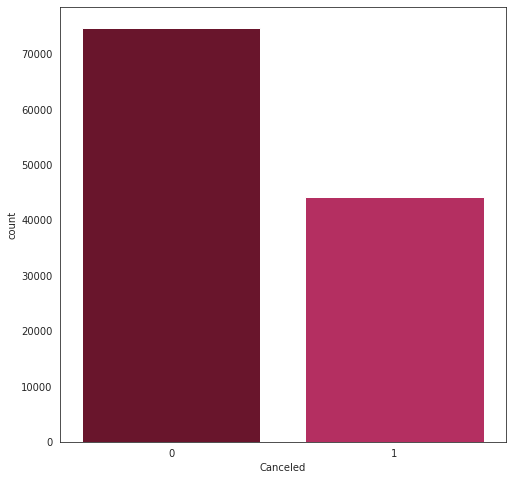

In [31]:
#Canceled=1, Not canceled= 0
canceled_data = dataFrame['Canceled']
sns.countplot(canceled_data, palette=['#770726','#ca195b'])

plt.show()

***Majority of bookings were not canceled, still some half of the bookings were canceled***


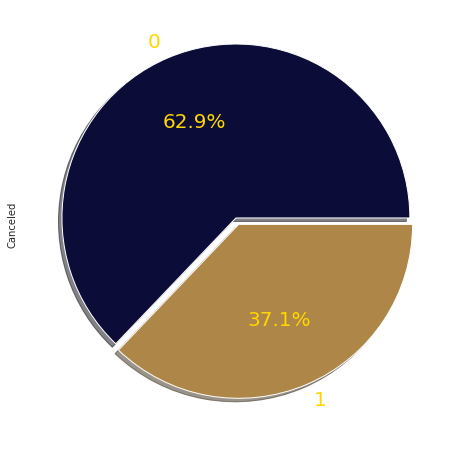

In [32]:
colors = ['#0c0c38', '#ae8647']
dataFrame['Canceled'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, explode=(0.04,0),colors=colors,textprops={'fontsize': 20,'color':'gold'})
plt.show()


**According to the pie chart, 63% of bookings were not canceled and 37% of the bookings were canceled at the Hotel**

# **Now lets check the cancelled bookings for each hotel :** 

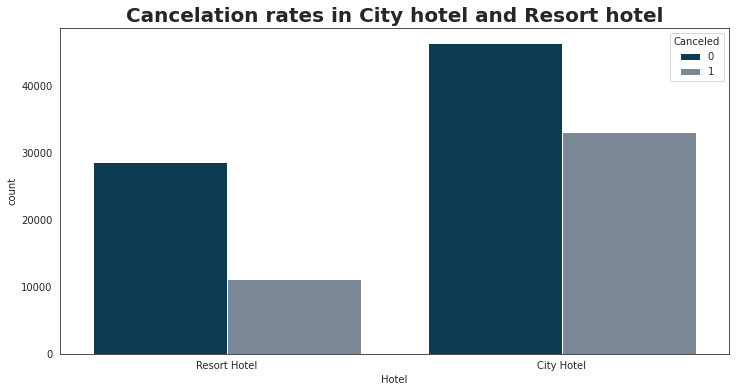

In [33]:
##cancelation rates for both the hotels
plt.figure(figsize=(12, 6))

sns.countplot(x='Hotel',hue="Canceled", data=dataFrame,palette=('#00415c','#778899'))
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)
plt.show()

**Both Booking ratio and cancelation ratio is high in City Hotel. It means City Hotel is more popular among guests.**
**Whereas booking ratio is less in Resort hotel but the cancellations were also low.**

#***Q 3 From which country majority of guest came ?***

**Here we will be checking the country of origin having most of guests that came into hotels...**

In [34]:
dataFrame.Country.value_counts(normalize=True)

PRT    0.408636
GBR    0.102012
FRA    0.087596
ESP    0.072062
DEU    0.061288
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: Country, Length: 177, dtype: float64

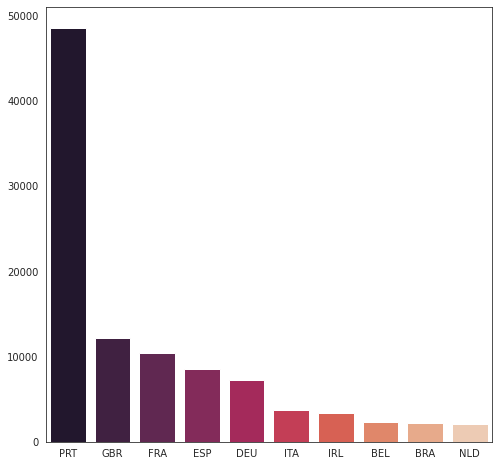

In [35]:
# ploting the bar graph for the country wise bookings
sns.barplot (y= list(dataFrame.Country.value_counts().head (10)), x= list(dataFrame.Country.value_counts().head(10).index),palette='rocket')


**Around 40% of all bookings were booked from Portugal followed by Great Britain(10%) & France(8%).**

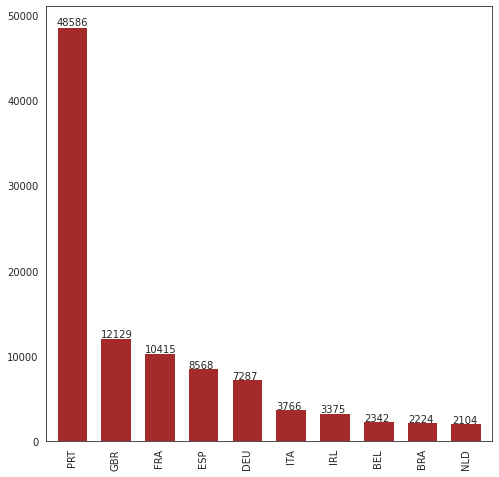

In [36]:
# plotting graph again with values 
ax= dataFrame.Country.value_counts().head(10).plot(width=0.7,kind= 'bar',color='brown');
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

**As we can conclude from the graph that Most of the guests are from western europe, in which Portugal being the one with most bookings,on second there is Great Britain(UK),and after that France and so on...**
**The hotels can use this outcome to attract more customers from the same region to increase their sales by providing more efforts like discount or meal types...**

#***Q 4. Which are the busiest months for hotel ?***
**Now we will check that in which month the hotels were most occupied.**
**It can help both visitors and hotels, as the hotel owner can make neccessary arrangement for fullfilling the customer needs in the busiest month, so that they can be converted into repeated guests..**
**On the other hand visitors can also decide if they want to stay in busiest month or they want to ignore the busiest month as per their convienence**. 

**We will also look for the most unoccupied month**

In [37]:
dataFrame.ArrivingMonth.value_counts(normalize=True)

August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: ArrivingMonth, dtype: float64


**August is the most occupied (busiest) month with 11.62% bookings and January is the most unoccupied month with 4.96% bookings.**

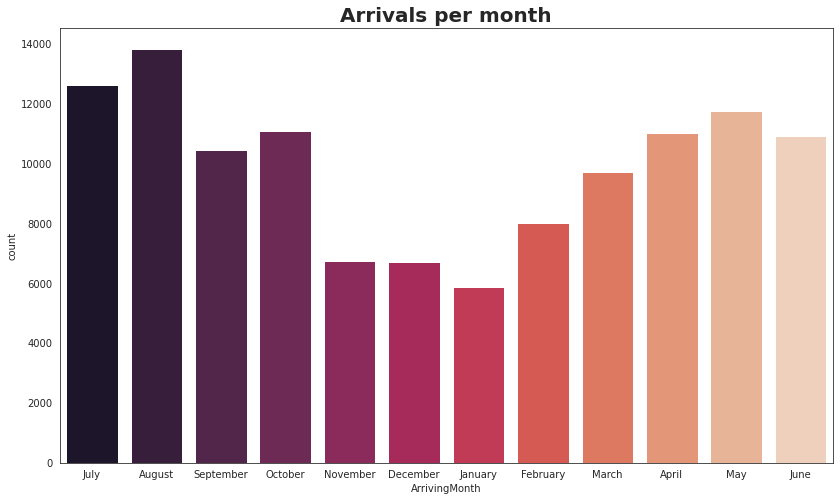

In [38]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 2)
sns.set_style('white')
sns.countplot(data = dataFrame, x = 'ArrivingMonth',palette='rocket')
plt.title('Arrivals per month',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

**Most bookings were done in the month of August,July,May,June,and so on...**
**Both hotels have the fewest guests during the winter.**
**It means guests mostly visits in Summer days to these hotels.. hotels can provide such facilities to lure them...**

#***Q 5. In which years maximum bookings are done for both hotels ?***
**This data will help us to know wheather the demand for hotels is increasing or decreasing...**

In [39]:
dataFrame.ArrivingYear.value_counts(normalize=True)

2016    0.474651
2017    0.341503
2015    0.183847
Name: ArrivingYear, dtype: float64

**47% bookings were done in 2016, 34% in 2017 and 18 percent in 2015.. We can see increasing tendency in bookings year wise**


# Lets plot it

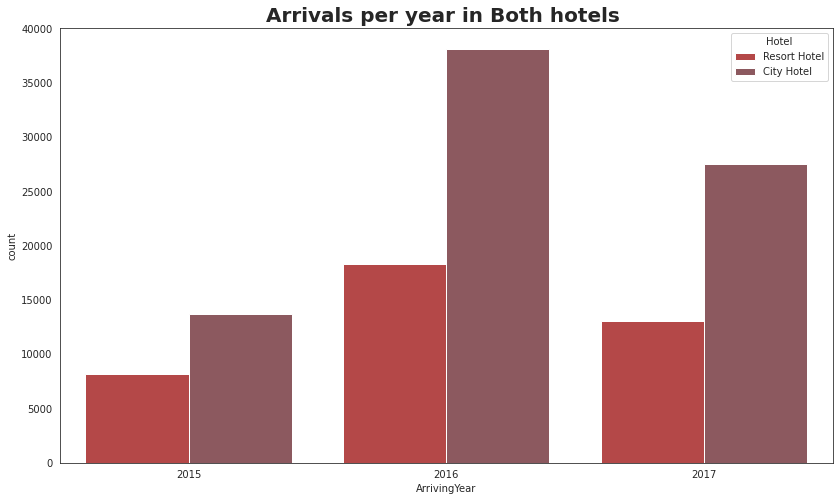

In [40]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.set_style('white')
sns.countplot(x='ArrivingYear',hue='Hotel', data=dataFrame,palette=('#c63636','#945158'))
plt.title("Arrivals per year in Both hotels ",fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

**We can see most of the bookings were in the year 2016 and higher bookings were done in City hotel and do not increase proportionately over the year...**



#***Q 6. Which was the most booked accommodation type (Single, Couple, Family)?***

**Lets find out...**

In [41]:
dataFrame_not_canceled = dataFrame[dataFrame['Canceled'] == '0']
dataFrame_not_canceled.head()

,Hotel,Canceled,LeadTime,ArrivingYear,ArrivingMonth,ArrivingWeek,ArrivingDate,WeekendStay,WeekStay,Adults,Children,Babies,Meal,Country,Segment,DistChannel,RepeatGuest,PrevCancel,PrevBook,BookRoomType,AssignRoomType,ChangeBooking,DepositType,WaitingDays,CustomerType,ADR,ParkSpace,SpecialRequest,Reservation,ReservationDate,Kids,total_members,Arrival Date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,0.0,2.0,2015-07-01


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


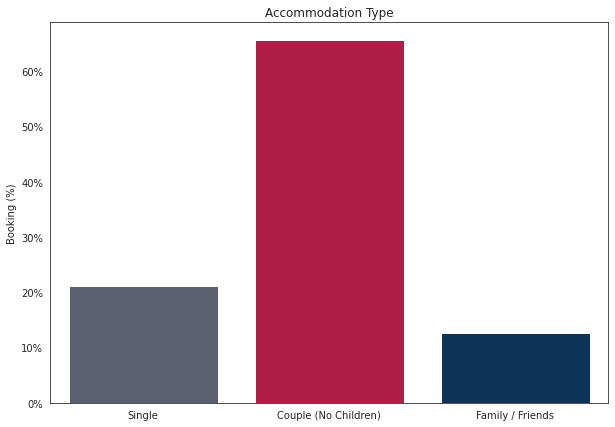

In [42]:
## Select single, couple, multiple adults and family
single   = dataFrame_not_canceled[(df_not_canceled.Adults==1) & (dataFrame_not_canceled.Children==0) & (dataFrame_not_canceled.Babies==0)]
couple   = dataFrame_not_canceled[(df_not_canceled.Adults==2) & (dataFrame_not_canceled.Children==0) & (dataFrame_not_canceled.Babies==0)]
family   = dataFrame_not_canceled[df_not_canceled.Adults + dataFrame_not_canceled.Children + dataFrame_not_canceled.Babies > 2]


## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/dataFrame_not_canceled.shape[0]*100 for x in count]


## Draw the curve
plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,7),palettes=('#565e75','#c7063b','#003366'))

**So as per the above graph, we can see that most booked accomodation type is Couple room and that too with a very high percentage than other type of accomodations...**
**So hotels can provide the services and accomodations as per the trend...**

#***Q 7. What are the Market Segment of both hotels ?***

In [43]:
dataFrame.Segment.value_counts(normalize=True)

Online TA        0.474373
Offline TA/TO    0.203199
Groups           0.166580
Direct           0.104695
Corporate        0.042986
Complementary    0.006173
Aviation         0.001993
Name: Segment, dtype: float64

**Around 47% of bookings are made via Online Travel Agents, almost 20% of bookings are made via Offline Travel Agents and less than 20% are Direct bookings without any other agents.**

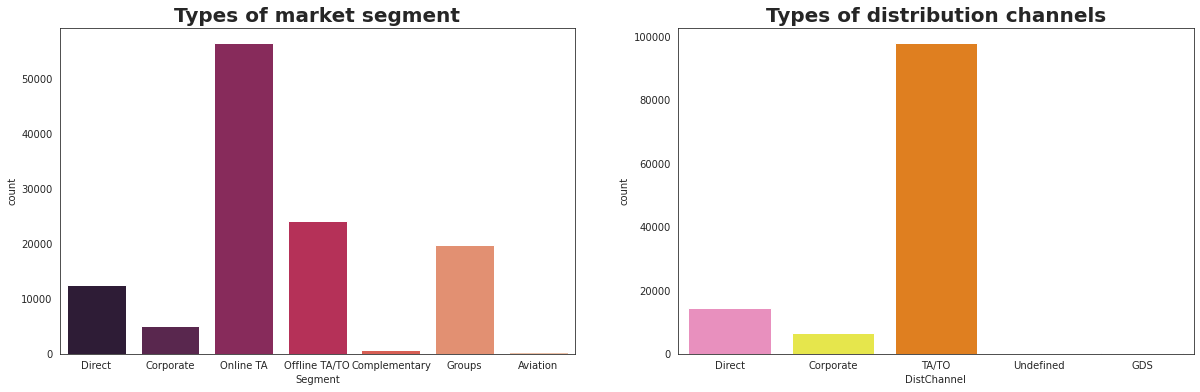

In [44]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Segment', data=dataFrame, palette='rocket')
plt.title('Types of market segment',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.countplot(data = dataFrame, x = 'DistChannel',  palette='Set1_r')
plt.title('Types of distribution channels',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

**Majority Distribution channels are Travel agencies(offline/online).** 
**Indirect bookings via travel agents by online and offline modes are higher compared to direct bookings.**

**As we can see, Mostly customers choose to opt for a travel agent wheather online or offline, reasons can be the discounts or other complementary facilities provided by these agents.. for example : MakeMY Trip, Trivago, sometimes offers huge discounts or they provide pick up and drop facilities to thier customers.**

#**Correlation**

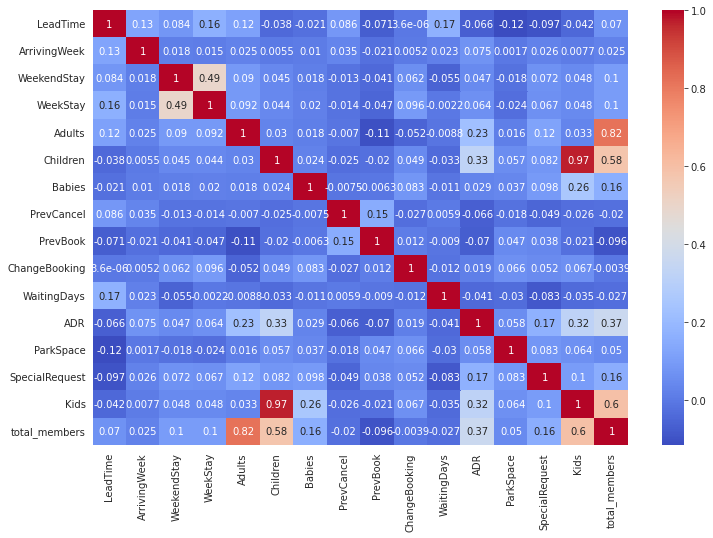

In [45]:
#cmap='RdYlGn'
plt.figure(figsize=(12,8))
sns.heatmap(dataFrame.corr(),annot=True,cmap='coolwarm')

#**Hypothesis**

#**Meal**

In [46]:
dataFrame.Meal.value_counts(normalize=True)

BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: Meal, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


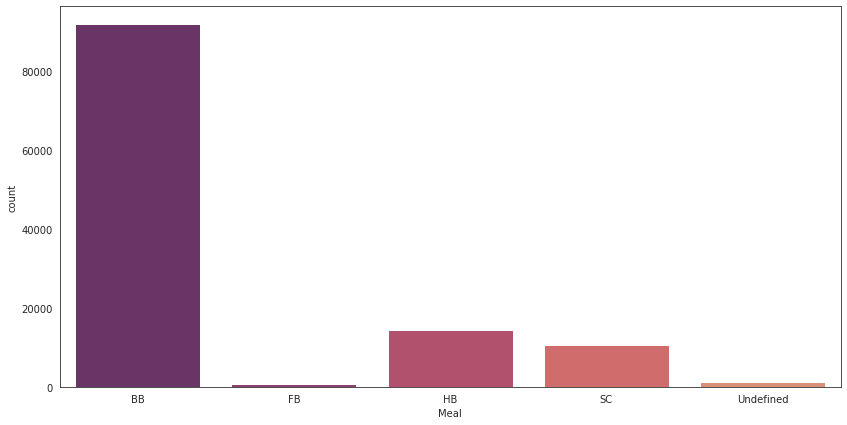

In [47]:
plt.figure(figsize=(14,7))
sns.countplot(dataFrame['Meal'], palette='flare_r')
plt.show()

#**Cancellations by type of Guests (Repeated/NonRepeated)**

Text(0.5, 1.0, 'Cancellations by repeated guests')

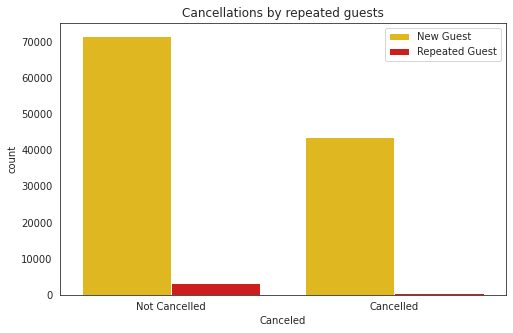

In [48]:
plt.figure(figsize=(8,5))
sns.countplot(x = "Canceled", hue = 'RepeatGuest', data = dataFrame, palette='hot_r')
plt.legend(['New Guest', 'Repeated Guest'])
plt.xticks(ticks=[0,1], labels=['Not Cancelled', 'Cancelled'])
plt.title("Cancellations by repeated guests")

**We observe that repeated guests cancels their bookings less often than new guests.**

#**Cancellation by Market Segments**

Text(0.5, 1.0, 'Cancellation by Market Segments')

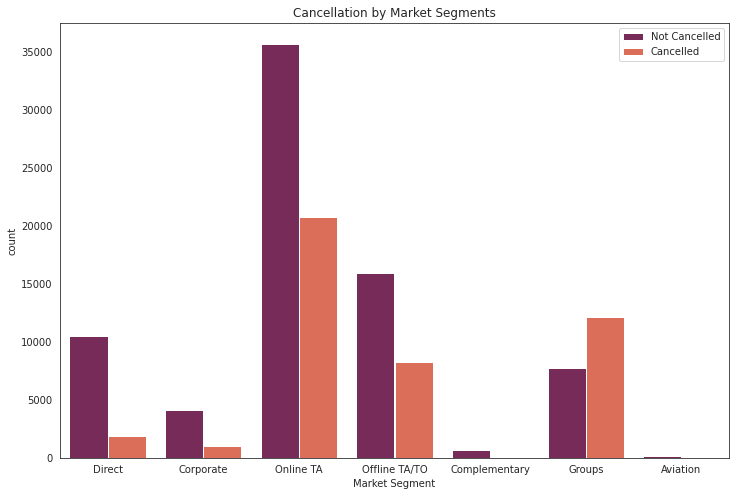

In [49]:
plt.figure(figsize = (12,8))
sns.countplot(x = "Segment", hue = 'Canceled', data = dataFrame,palette='rocket')
plt.xlabel("Market Segment")
plt.legend(['Not Cancelled', 'Cancelled'])
plt.title("Cancellation by Market Segments")

**We can see that Group Bookings gets cancelled more often. Direct segment has quite low cancellation rate compared to total number of bookings. For Offline TA/TO & Online TA have almost 50% cancellation rates.**


#**Repeated Guest**

In [50]:
dataFrame.RepeatGuest.value_counts(normalize=True)

0    0.967989
1    0.032011
Name: RepeatGuest, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


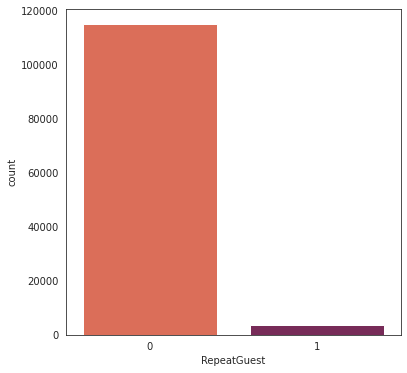

In [51]:
plt.figure(figsize=(6,6))
sns.countplot(dataFrame['RepeatGuest'], palette='rocket_r')
plt.show()

## **CONCLUSION:**


**1.City hotel were booked in majority. So its good to spend the most targeting fund on these hotel.**

**2.Cancellation ratio of city hotel is high then resort hotel though city hotels bookings are also high comparatively resort hotels.**

**3.Many guests come from Western European countries. So hotels should spend a significant amount of budget in these areas.**

**4.May to August are the busiest months so the hotels should target more customers in this period and try to do more business for profit.**

**5.Most customers are couples and bringing kids along with them is rare so the hotels should advertise in such a way that it attracts the couples more.**

**6.In Market segment many of the hotel bookings are done from Travel agencies.** 

**7.Encourage Direct bookings by offering special discounts.**

**8.Hotel has low repeated guest, Hotel should depend on online marketing companies for advertising to increase the repeated guests.**

**9.New Guests cancels the most then the repeated guests.**

**10.In food most popular meal plan was BB preferred by guests.** 